In [2]:
import numpy as np
import pandas as pd

In [3]:
rawdataset=np.load('new_feature_matrix.npy')

In [4]:
print(rawdataset)

[[[1.07900000e+03 2.44970000e+04 1.14473800e+05 7.24000000e+00
   3.74810000e+04]
  [8.06000000e+02 6.42370000e+04 5.03350638e+04 3.98300000e+01
   2.45560000e+04]
  [9.61000000e+02 4.16070000e+04 1.40386969e+05 7.41000000e+00
   2.58810000e+04]
  ...
  [1.00000000e+01 2.13620000e+04 5.88473000e+04 2.85300000e+01
   1.50300000e+03]
  [4.00000000e+00 1.27270000e+04 6.91904286e+04 0.00000000e+00
   2.59000000e+02]
  [4.00000000e+00 1.98260000e+04 1.01618000e+05 2.40600000e+01
   4.17500000e+03]]

 [[1.05100000e+03 2.44970000e+04 1.14473800e+05 1.44900000e+01
   3.77650000e+04]
  [7.88000000e+02 6.42370000e+04 5.03350638e+04 1.06200000e+01
   2.27340000e+04]
  [9.42000000e+02 4.16070000e+04 1.40386969e+05 7.41000000e+00
   2.44640000e+04]
  ...
  [1.00000000e+01 2.13620000e+04 5.88473000e+04 2.85300000e+01
   1.41100000e+03]
  [4.00000000e+00 1.27270000e+04 6.91904286e+04 7.89000000e+00
   2.84000000e+02]
  [5.00000000e+00 1.98260000e+04 1.01618000e+05 1.92500000e+01
   3.46300000e+03]]



In [5]:
np.shape(rawdataset)

(90, 172, 5)

In [6]:
dataset = rawdataset.reshape(-1, rawdataset.shape[2])

In [13]:
np.shape(dataset)

(15480, 5)

In [14]:
X = dataset[:, 1:4]
y = dataset[:, 4]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
# 训练随机森林解决回归问题
from sklearn.ensemble import RandomForestRegressor

In [18]:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [19]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2score:',r2_score(y_test,y_pred))

Mean Absolute Error: 1634.8143017011091
Mean Squared Error: 20353515.410006534
Root Mean Squared Error: 4511.487050852139
R2score: 0.7681926632214935


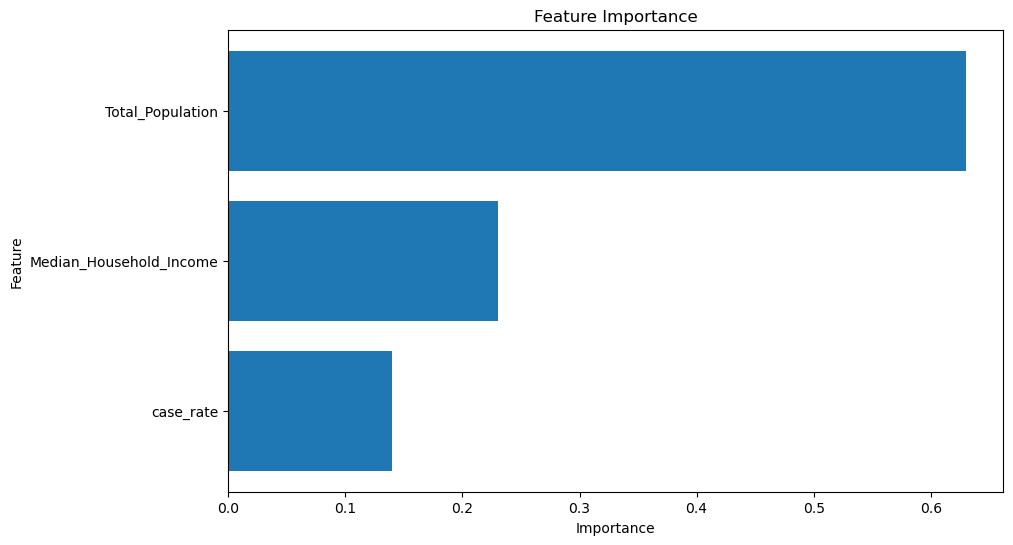

In [20]:
import matplotlib.pyplot as plt

feature_importances = regressor.feature_importances_

feature_names = ['Median_Household_Income', 'Total_Population', 'case_rate']

# 创建一个特征重要性的DataFrame
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 对特征重要性进行排序
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# 绘制特征重要性图
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # 将最重要的特征放在图的顶部
plt.show()


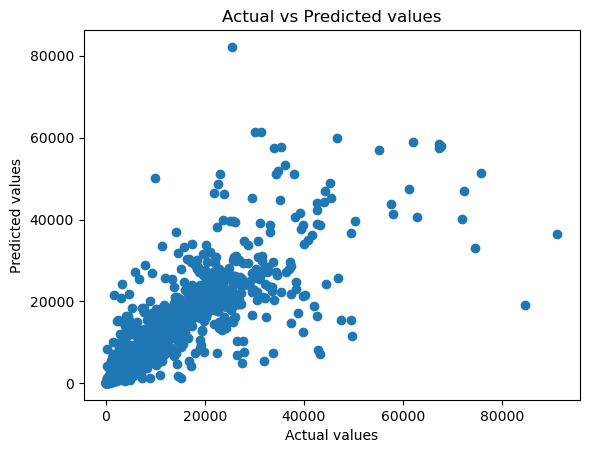

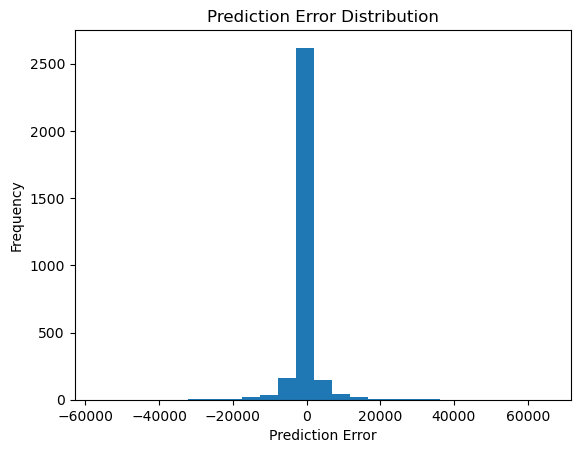

In [21]:
# 绘制实际值与预测值
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()

# 绘制误差分布
errors = y_test - y_pred
plt.hist(errors, bins=25)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV

# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# 创建随机森林回归器
rf = RandomForestRegressor(random_state=0)

# 创建GridSearchCV对象
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 查看最佳参数
best_params = grid_search.best_params_
best_params


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; 

/Users/liuzhang/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_f

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.8s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=Non

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_featu

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=20

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_featu

/Users/liuzhang/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
486 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
192 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/liuzhang/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/liuzhang/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/liuzhang/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

In [23]:
regressor_optimized = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    bootstrap=True,
    random_state=0
)
regressor_optimized.fit(X_train, y_train)


RandomForestRegressor(max_features='sqrt', min_samples_split=10,
                      n_estimators=300, random_state=0)

In [24]:
y_pred_optimized = regressor_optimized.predict(X_test)

# 使用相同的性能指标进行评估
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_optimized))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_optimized))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_optimized)))
print('R2 Score:', r2_score(y_test, y_pred_optimized))


Mean Absolute Error: 1665.8038858280404
Mean Squared Error: 16509750.550496103
Root Mean Squared Error: 4063.2192348550557
R2 Score: 0.811969518341463


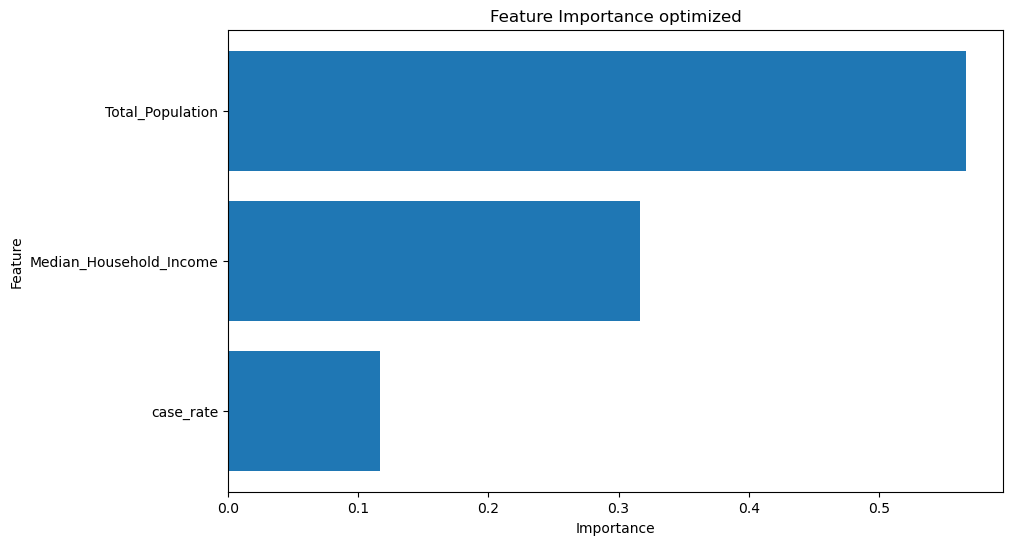

In [25]:
feature_importances_optimized = regressor_optimized.feature_importances_

feature_names = ['Median_Household_Income', 'Total_Population', 'case_rate']

# 创建一个特征重要性的DataFrame
importances_df_op = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_optimized
})

# 对特征重要性进行排序
importances_df_op = importances_df_op.sort_values(by='Importance', ascending=False)

# 绘制特征重要性图
plt.figure(figsize=(10, 6))
plt.barh(importances_df_op['Feature'], importances_df_op['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance optimized')
plt.gca().invert_yaxis()  # 将最重要的特征放在图的顶部
plt.show()

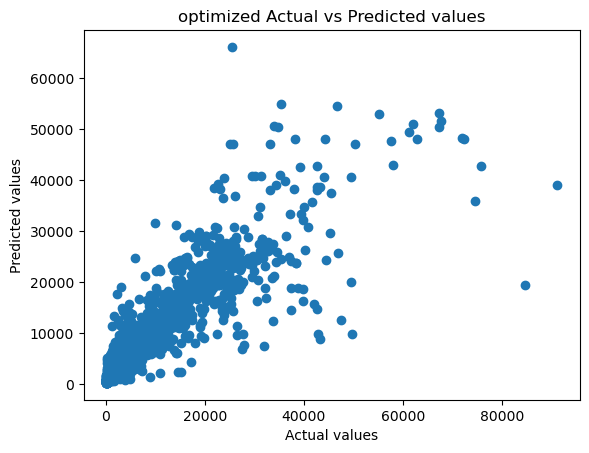

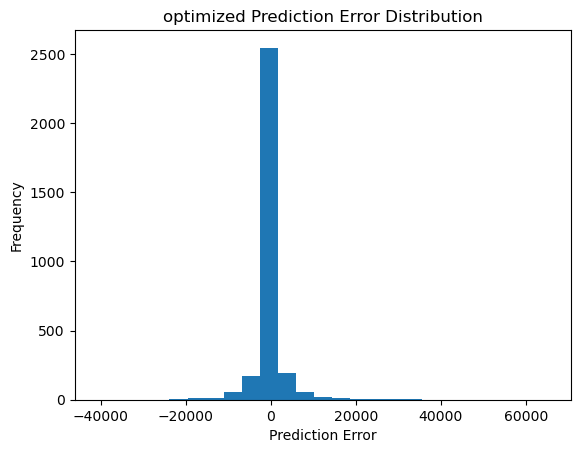

In [26]:
# 绘制实际值与预测值
plt.scatter(y_test, y_pred_optimized)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('optimized Actual vs Predicted values')
plt.show()

# 绘制误差分布
errors = y_test - y_pred_optimized
plt.hist(errors, bins=25)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('optimized Prediction Error Distribution')
plt.show()

In [27]:
print(importances_df_op)

                   Feature  Importance
1         Total_Population    0.566950
0  Median_Household_Income    0.316610
2                case_rate    0.116439


In [28]:
print(importances_df)

                   Feature  Importance
1         Total_Population    0.629982
0  Median_Household_Income    0.230353
2                case_rate    0.139665


In [29]:
from sklearn.model_selection import KFold
import numpy as np

# 创建k-fold交叉验证器实例，这里的k设置为2
kf = KFold(n_splits=5)

# 展示每次分割的训练集和验证集的索引
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# 此处的输出只用于展示，实际上应当在这些索引上训练模型并评估结果


TRAIN: [ 3096  3097  3098 ... 15477 15478 15479] TEST: [   0    1    2 ... 3093 3094 3095]
TRAIN: [    0     1     2 ... 15477 15478 15479] TEST: [3096 3097 3098 ... 6189 6190 6191]
TRAIN: [    0     1     2 ... 15477 15478 15479] TEST: [6192 6193 6194 ... 9285 9286 9287]
TRAIN: [    0     1     2 ... 15477 15478 15479] TEST: [ 9288  9289  9290 ... 12381 12382 12383]
TRAIN: [    0     1     2 ... 12381 12382 12383] TEST: [12384 12385 12386 ... 15477 15478 15479]
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=3

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   3.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False